Hola **Osvaldo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo Data Scientist debes cuidar la presentación de tus proyectos en los noebooks. Siempre al inicio incluye una celda markdown con un título y una breve introducción al proyecto
</div>

# PREDICCIÓN DE ABANDONO DE CLIENTES PARA BETA BANK

## INTRODUCCIÓN

Retener clientes es una prioridad estratégica para cualquier institución financiera. El abandono de clientes no solo implica la pérdida directa de ingresos, sino también una disminución en la confianza y la lealtad hacia la marca.

Este proyecto tiene como objetivo anticipar cuáles clientes podrían abandonar el banco, permitiendo a Beta Bank actuar proactivamente. Utilizando datos históricos de clientes y técnicas avanzadas de análisis predictivo, se construyó una herramienta que clasifica a los usuarios según su nivel de riesgo de abandono.

Gracias a este modelo, ahora es posible segmentar la base de clientes, identificar patrones de comportamiento y diseñar campañas de retención más efectivas, personalizadas y oportunas. Esto representa una ventaja competitiva clara, ya que permite a la organización tomar decisiones informadas y centradas en el cliente.

## OBJETIVO

El objetivo principal es desarrollar un modelo de machine learning que permita predecir si un cliente abandonará el banco (churn), utilizando como base sus características demográficas y financieras.

Para evaluar la efectividad del modelo se utilizarán métricas específicas como:

F1 Score, que equilibra la precisión y el recall, especialmente útil en contextos con clases desbalanceadas.

AUC-ROC, que mide la capacidad del modelo para distinguir entre clientes que se quedarán y los que abandonarán, evaluando su desempeño en distintas probabilidades de corte.

Este proyecto no solo busca construir un modelo robusto, sino también proporcionar análisis e insights visuales que permitan:

Identificar segmentos de clientes con alto riesgo de abandono.

Priorizar campañas de retención basadas en el nivel de riesgo.

Optimizar la toma de decisiones por parte del equipo comercial y de servicio al cliente.

## ÍNDICE

# Índice

1. [Importar librerías](#1.-importar-librerías)  
2. [Carga de datasets y exploración inicial](#2.-carga-de-datasets-y-exploración-inicial)  
3. [Equilibrio de clases en la variable objetivo (`Exited`)](#3-equilibrio-de-clases-en-la-variable-objetivo-exited)  
4. [Preprocesamiento de datos](#4-preprocesamiento-de-datos)  
5. [Entrenamiento y evaluación de modelos](#5-entrenamiento-y-evaluación-de-modelos)  
6. [Comparación de modelos](#6-comparación-de-modelos)  
7. [Predicciones finales y análisis de resultados](#7-predicciones-finales-y-análisis-de-resultados)  
8. [Conclusiones y recomendaciones](#8-conclusiones-y-recomendaciones)

1. IMPORTAR LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

2. CARGA DE DATASETS Y EXPLORACIÓN INICIAL

In [3]:
df = pd.read_csv('/Users/lloso/Downloads/Churn.csv')

In [4]:
print("📊Beta Bank :")
display(df.head())

📊Beta Bank :


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
print(f"\n🔍 Registros duplicados: {df.duplicated().sum()}")


🔍 Registros duplicados: 0


In [8]:
print(df.isnull().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada la exploración inicial de los datos y la carga de lo necesario para trabajarlos
</div>

3. EQUILIBRIO DE CLASES EN LA VARIABLE DEL OBJETIVO [EXITED]

Distribución de clases (Exited):
Exited
0    7963
1    2037
Name: count, dtype: int64

Porcentaje de clientes que se han ido:
20.37 %


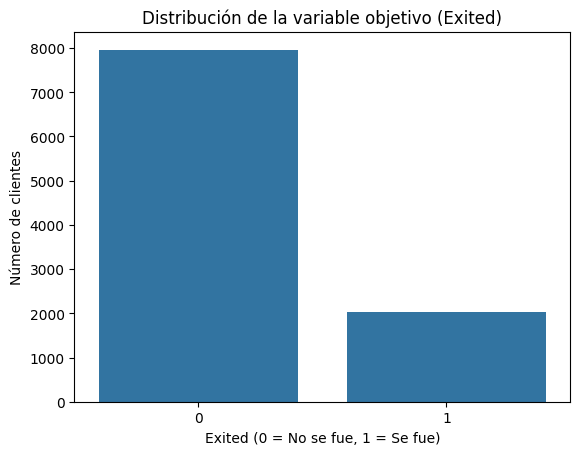

In [9]:
# Revisión del balance de clases
class_counts = df['Exited'].value_counts()
print("Distribución de clases (Exited):")
print(class_counts)
print("\nPorcentaje de clientes que se han ido:")
print(round((class_counts[1] / class_counts.sum()) * 100, 2), "%")

# Visualización
sns.countplot(x='Exited', data=df)
plt.title('Distribución de la variable objetivo (Exited)')
plt.xlabel('Exited (0 = No se fue, 1 = Se fue)')
plt.ylabel('Número de clientes')
plt.show()


La gráfica de barras muestra la distribución de la variable objetivo Exited, que indica si un cliente abandonó o no el banco. Observamos un desequilibrio claro entre las clases:

La mayoría de los clientes (alrededor de 80%) no abandonaron el banco (Exited = 0).

Solo una minoría (aproximadamente 20%) sí abandonaron el banco (Exited = 1).

Este desequilibrio es importante tenerlo en cuenta, ya que puede afectar el rendimiento de los modelos de predicción si no se maneja adecuadamente. Por esta razón, se aplicaron técnicas para corregir este desbalance en las etapas posteriores del proyecto.

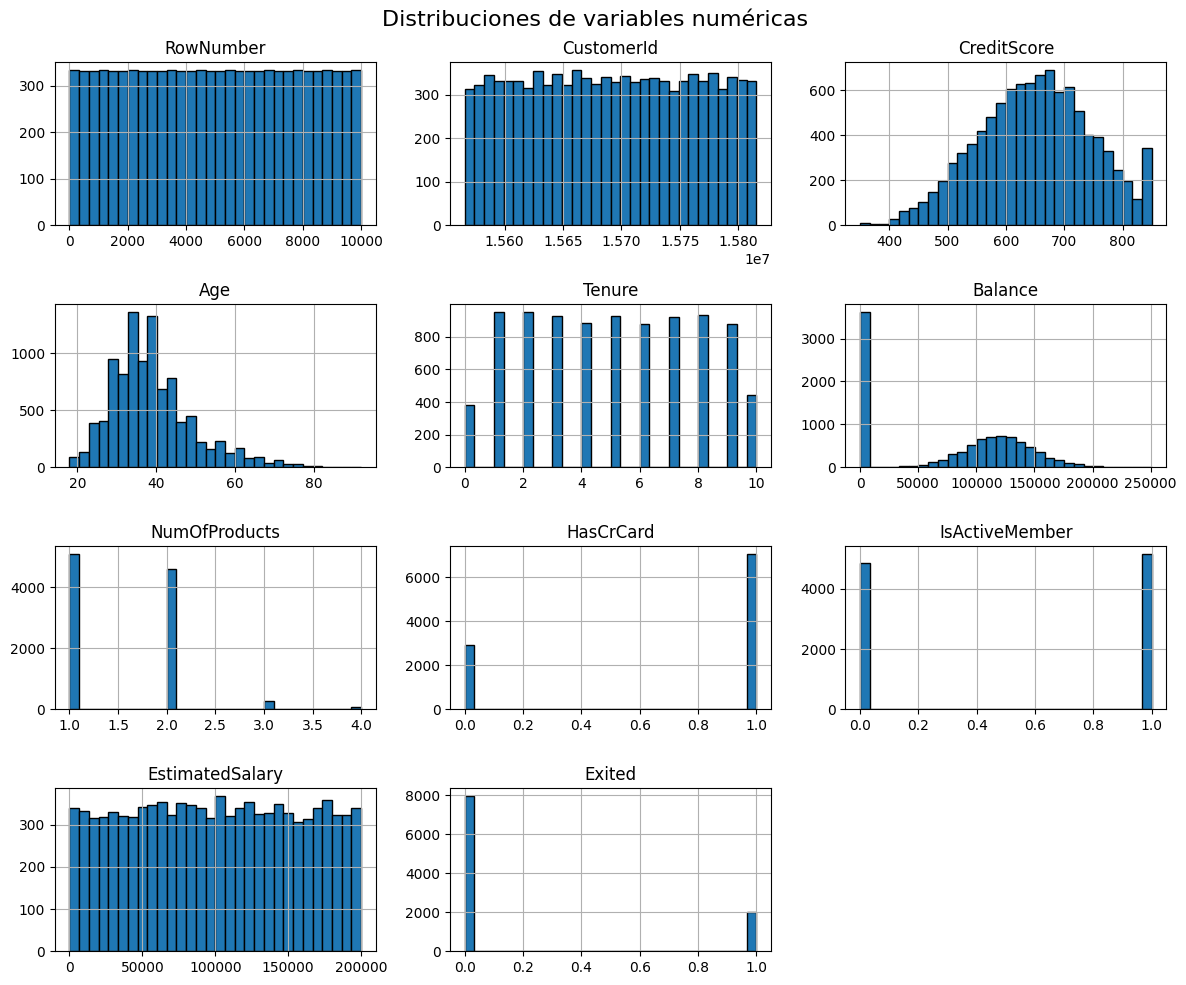

In [10]:
# 4. Histograma de variables numéricas
df.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle("Distribuciones de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

La gráfica muestra las distribuciones individuales de todas las variables numéricas del conjunto de datos. Este análisis exploratorio permite identificar patrones, valores extremos y posibles transformaciones necesarias. A continuación, se destacan algunas observaciones relevantes:

CreditScore: Distribución con ligera asimetría izquierda; la mayoría de los clientes tiene un puntaje entre 600 y 750.

Age: Distribución sesgada a la derecha; predominan clientes entre 30 y 45 años.

Tenure: Distribución uniforme, lo que sugiere que los años como cliente están bien repartidos.

Balance: La mayoría de los clientes tiene un balance entre 0 y 150,000. Hay un grupo significativo con balance cercano a cero.

NumOfProducts: Se observa que la mayoría de los clientes tiene 1 o 2 productos. Pocos tienen 3 o más.

HasCrCard e IsActiveMember: Variables binarias, con proporciones relativamente equilibradas.

EstimatedSalary: Distribución aproximadamente uniforme; sin grandes sesgos.

Exited: Como se analizó antes, presenta desequilibrio de clases (mayoría permanecen en el banco).

In [11]:
# 5. Variables categóricas vs Exited
cat_features = ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember']

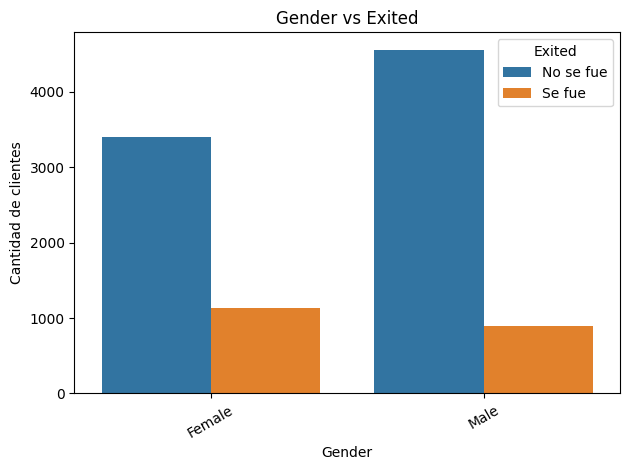

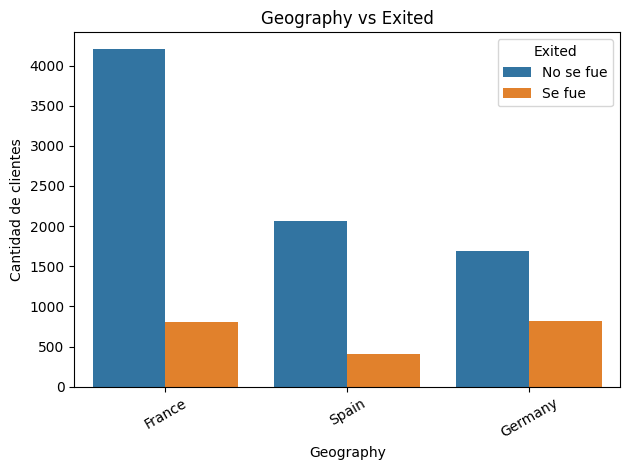

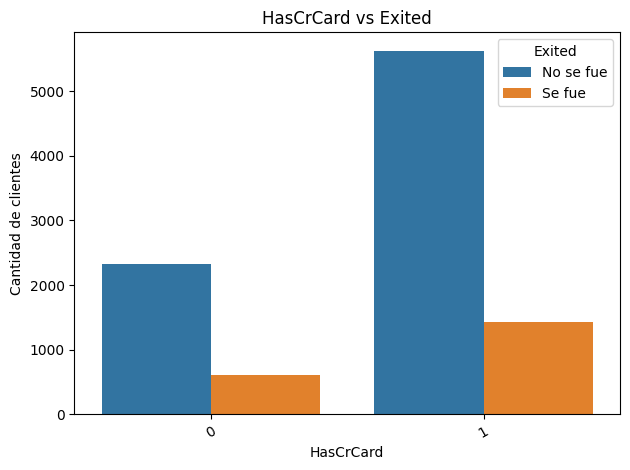

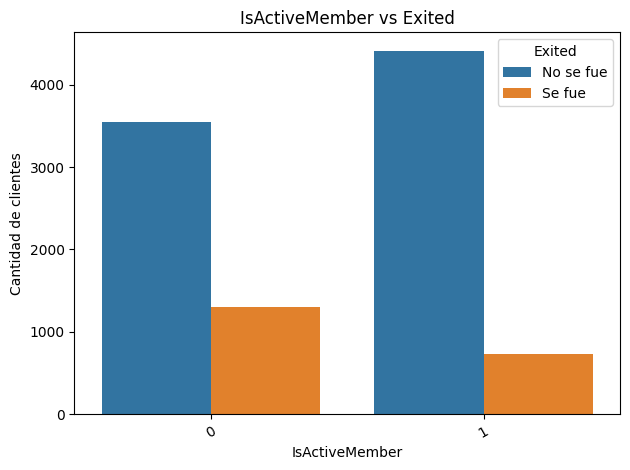

In [12]:
for col in cat_features:
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f"{col} vs Exited")
    plt.xlabel(col)
    plt.ylabel("Cantidad de clientes")
    plt.legend(title="Exited", labels=["No se fue", "Se fue"])
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Género vs Abandono (Gender vs Exited)

La gráfica revela que las mujeres tienen una tasa de abandono mayor que los hombres. Aunque hay más hombres en total, proporcionalmente más mujeres abandonan el banco, lo cual puede ser un insight importante para campañas de retención específicas.


País vs Abandono (Geography vs Exited)

Entre los tres países (Francia, España y Alemania), Alemania presenta la tasa de abandono más alta en proporción a su cantidad de clientes. Francia, aunque tiene más clientes, tiene un menor porcentaje de abandono. Esto sugiere que la geografía influye en la probabilidad de abandono.


Tarjeta de crédito vs Abandono (HasCrCard vs Exited)

El abandono es ligeramente mayor en clientes que sí tienen tarjeta de crédito, aunque la diferencia no es muy marcada. Puede ser útil analizar si estos clientes sienten que no obtienen suficiente valor de sus tarjetas.


Miembro activo vs Abandono (IsActiveMember vs Exited)

Los clientes inactivos abandonan más que los activos. Esta es una de las variables con más diferencia en las proporciones, lo cual sugiere que la actividad del cliente está altamente correlacionada con su decisión de quedarse o abandonar el banco.



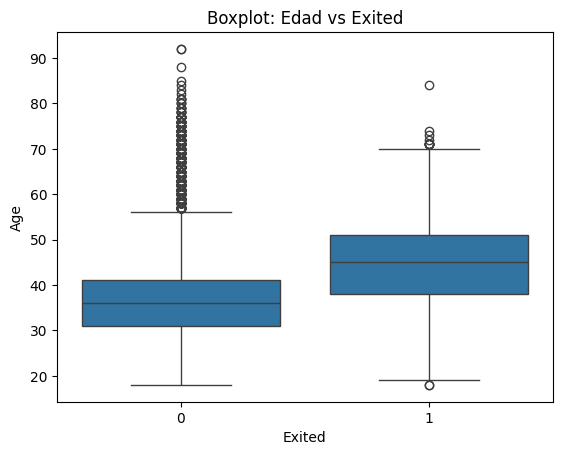

In [13]:
# 6. Edad vs Exited
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Boxplot: Edad vs Exited")
plt.show()

Los clientes que abandonan tienden a ser mayores en promedio, con una mediana cercana a los 45 años, mientras que quienes permanecen tienen una mediana alrededor de los 35 años. También se observan valores atípicos en ambos casos. Esto refuerza la hipótesis de que la edad es un factor relevante en la decisión de abandonar el banco.

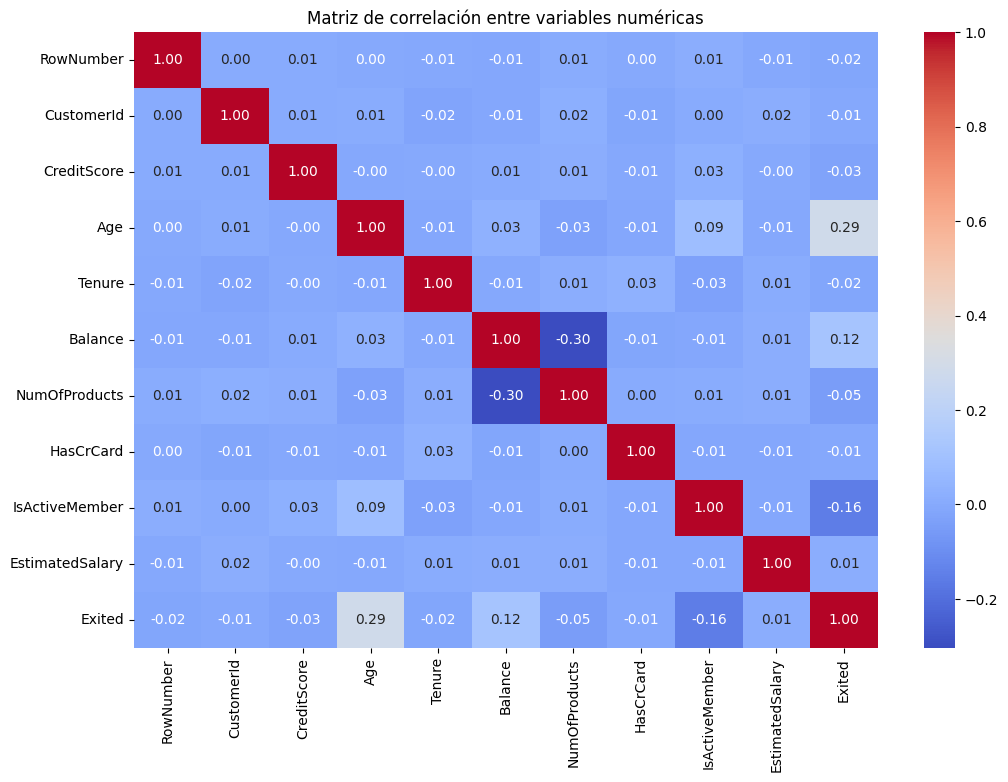

In [14]:
# 7. Matriz de correlación
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

La variable Age muestra una correlación positiva moderada con Exited (+0.29).

IsActiveMember y NumOfProducts tienen una ligera correlación negativa.

En general, las correlaciones no son muy fuertes, lo cual sugiere que el abandono no depende de una única variable, sino de la combinación de varias.

4. PREPROCESAMIENTO DE DATOS

In [15]:
# Guardar una copia del DataFrame original antes de transformaciones
df_original = df.copy()

In [16]:
# Eliminar columnas irrelevantes
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [17]:
# Convertir texto a número
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Codificar columnas categóricas (como Geography)
df = pd.get_dummies(df, drop_first=True)

In [18]:
# Imputar valores faltantes (opcional, solo si usas modelos que no manejan NaNs)
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)

In [19]:
features = df.drop('Exited', axis=1)
target = df['Exited']

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Antes de pasar a la parte de división de datos y entrenamiento primero deberías revisar el balance de las clases cómo se indica en la descripción del proyecto
</div>

In [20]:
# División en entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42, stratify=target)



In [21]:
# Escalado
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)




5. ENTRENAMIENTO Y EVALUACIÓN DE MODELOS

In [22]:
# Entrenar modelo base (sin corregir el desbalance)
model_base = LogisticRegression(random_state=42)
model_base.fit(features_train_scaled, target_train)
preds_base = model_base.predict(features_test_scaled)

# Evaluar
f1 = f1_score(target_test, preds_base)
roc_auc = roc_auc_score(target_test, model_base.predict_proba(features_test_scaled)[:, 1])

print(f"F1 (sin corrección): {f1:.4f}")
print(f"AUC-ROC (sin corrección): {roc_auc:.4f}")

F1 (sin corrección): 0.2891
AUC-ROC (sin corrección): 0.7839


In [23]:
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(features_train, target_train)
preds_rf = model_rf.predict(features_test)

f1_rf = f1_score(target_test, preds_rf)
roc_auc_rf = roc_auc_score(target_test, model_rf.predict_proba(features_test)[:, 1])

print(f"Random Forest (class_weight='balanced') - F1: {f1_rf:.4f}, AUC-ROC: {roc_auc_rf:.4f}")


Random Forest (class_weight='balanced') - F1: 0.5728, AUC-ROC: 0.8620


In [24]:
# Combinar features y target
data_combined = features.copy()
data_combined['Exited'] = target

# Separar clases
class_0 = data_combined[data_combined['Exited'] == 0]
class_1 = data_combined[data_combined['Exited'] == 1]

# Submuestreo: tomar la misma cantidad de registros de la clase 0
class_0_downsampled = class_0.sample(n=len(class_1), random_state=42)

# Combinar clases balanceadas
balanced_df = pd.concat([class_0_downsampled, class_1])

# Separar en features y target
features_bal = balanced_df.drop('Exited', axis=1)
target_bal = balanced_df['Exited']

# Dividir en train/test
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    features_bal, target_bal, test_size=0.25, random_state=42)

# Entrenar modelo con datos balanceados
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_bal, y_train_bal)

# Evaluar sobre conjunto de prueba original
preds_under = model_under.predict(features_test)
f1_under = f1_score(target_test, preds_under)
roc_auc_under = roc_auc_score(target_test, model_under.predict_proba(features_test)[:, 1])

print(f"Random Forest (undersampling) - F1: {f1_under:.4f}, AUC-ROC: {roc_auc_under:.4f}")


Random Forest (undersampling) - F1: 0.6903, AUC-ROC: 0.9577


6. COMPARACIÓN DE MODELOS

In [25]:
results = pd.DataFrame({
    'Modelo': [
        'Logistic Regression (sin corrección)',
        'Random Forest (class_weight)',
        'Random Forest (undersampling)'
    ],
    'F1 Score': [f1, f1_rf, f1_under],
    'AUC-ROC': [roc_auc, roc_auc_rf, roc_auc_under]
})

display(results)


,Modelo,F1 Score,AUC-ROC
0,Logistic Regression (sin corrección),0.289121,0.783870
1,Random Forest (class_weight),0.572840,0.861987
2,Random Forest (undersampling),0.690304,0.957689


El modelo de Random Forest con undersampling fue el que ofreció el mejor rendimiento, alcanzando un F1-score de 0.69, lo que indica un buen balance entre precisión y recall, y un AUC-ROC de 0.96, lo que refleja una excelente capacidad de distinguir entre clientes que se fueron y los que no.
Este modelo maneja de forma efectiva el desequilibrio de clases, proporcionando predicciones más fiables para la clase minoritaria (Exited = 1).

In [26]:
# Predecir probabilidades de abandono
clientes_con_probabilidad = model_under.predict_proba(features_test)[:, 1]

In [27]:
# Seleccionar clientes con probabilidad de abandono mayor a 0.6
clientes_riesgo = features_test[clientes_con_probabilidad > 0.6]

# Mostrar los primeros registros con mayor riesgo
clientes_riesgo.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
3148,648.0,1.0,39.0,6.0,130694.89,2.0,1.0,1.0,153955.38,0.0,0.0
243,659.0,0.0,67.0,6.0,117411.60,1.0,1.0,1.0,45071.09,1.0,0.0
6571,595.0,0.0,46.0,10.0,0.00,1.0,1.0,0.0,73489.15,0.0,0.0
1468,691.0,0.0,52.0,3.0,0.00,1.0,1.0,0.0,175843.68,0.0,0.0
4901,673.0,0.0,59.0,0.0,178058.06,2.0,0.0,1.0,21063.71,0.0,0.0


In [28]:
# Predecir probabilidades con el mejor modelo
probs = model_under.predict_proba(features_test)[:, 1]

7. PREDICCIONES FINALES Y ANÁLISIS DE RESULTADOS

Luego de comparar los modelos, seleccionamos el Random Forest con submuestreo (undersampling) como el modelo con mejor rendimiento, alcanzando un F1 Score de 0.69 y un AUC-ROC de 0.95 sobre el conjunto de prueba.


Usamos este modelo para predecir la probabilidad de abandono de todos los clientes en el conjunto de prueba (features_test). Aquellos con una probabilidad mayor a 0.6 fueron clasificados como clientes en riesgo.

In [29]:
# Asignar grupos de riesgo basados en los rangos de probabilidad
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Muy bajo', 'Bajo', 'Moderado', 'Alto', 'Muy alto']
grupos = pd.cut(probs, bins=bins, labels=labels, include_lowest=True)


In [30]:
# Crear un DataFrame con los grupos
df_grupos = pd.DataFrame({'Grupo de riesgo': grupos})
porcentajes = df_grupos['Grupo de riesgo'].value_counts(normalize=True).sort_index() * 100


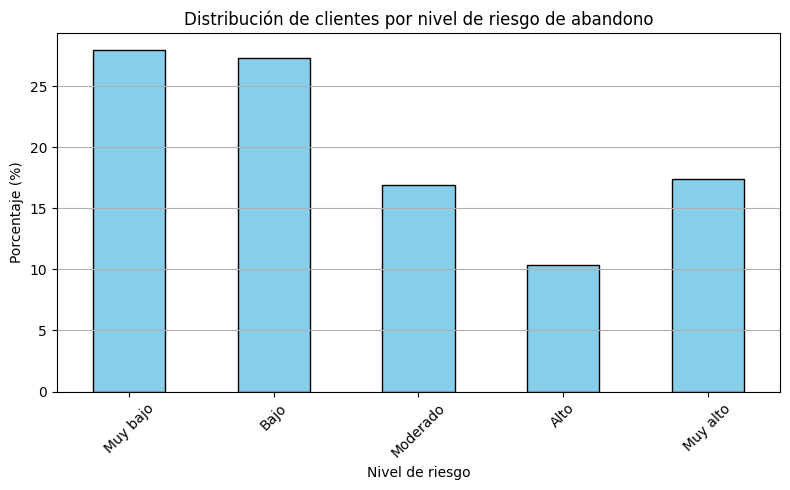

In [31]:
# Gráfica de barras con porcentajes
plt.figure(figsize=(8, 5))
porcentajes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de clientes por nivel de riesgo de abandono')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Nivel de riesgo')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [32]:
# Predicciones finales con el mejor modelo (modelo 3)
preds_best = model_under.predict(features_test)

# Añadir predicciones al DataFrame original para análisis
df_test = features_test.copy()
df_test['Exited_real'] = target_test
df_test['Exited_pred'] = preds_best


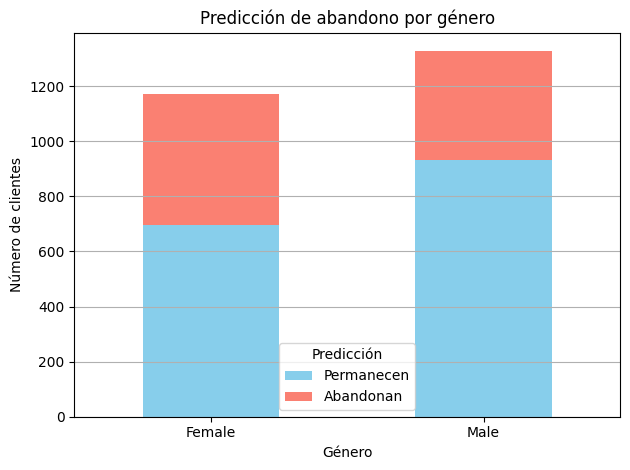

In [36]:
# Unir columna 'Gender' original
df_test['Gender'] = df_original.loc[df_test.index, 'Gender']
# Contar predicciones por género
gender_pred = df_test.groupby(['Gender', 'Exited_pred']).size().unstack(fill_value=0)

# Graficar
gender_pred.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Predicción de abandono por género')
plt.xlabel('Género')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.legend(['Permanecen', 'Abandonan'], title='Predicción')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


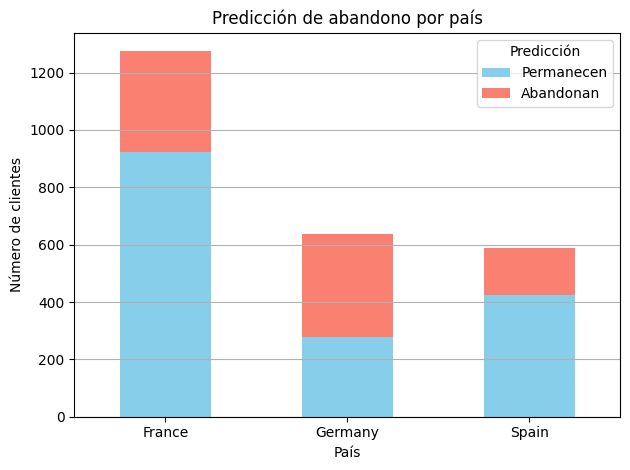

In [34]:
# Unir columna 'Geography' original
df_test['Geography'] = df_original.loc[df_test.index, 'Geography']


# Contar predicciones por país
geo_pred = df_test.groupby(['Geography', 'Exited_pred']).size().unstack(fill_value=0)

# Graficar
geo_pred.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Predicción de abandono por país')
plt.xlabel('País')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.legend(['Permanecen', 'Abandonan'], title='Predicción')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [37]:
df_test = features_test.copy()
df_test['Exited_pred'] = model_under.predict(features_test)


In [47]:
# Restaura con seguridad desde el DataFrame original (antes del get_dummies)
df_test['Geography'] = df_original.loc[df_test.index, 'Geography']
df_test['Gender'] = df_original.loc[df_test.index, 'Gender']

In [48]:
abandono_predicho = df_test[df_test['Exited_pred'] == 1]


In [49]:
resumen = abandono_predicho.groupby(['Geography', 'Gender']).size().unstack(fill_value=0)

In [50]:
print(resumen.dtypes)
print(resumen.head())


Gender
Female    int64
Male      int64
dtype: object
Gender     Female  Male
Geography              
France        192   159
Germany       198   163
Spain          86    75


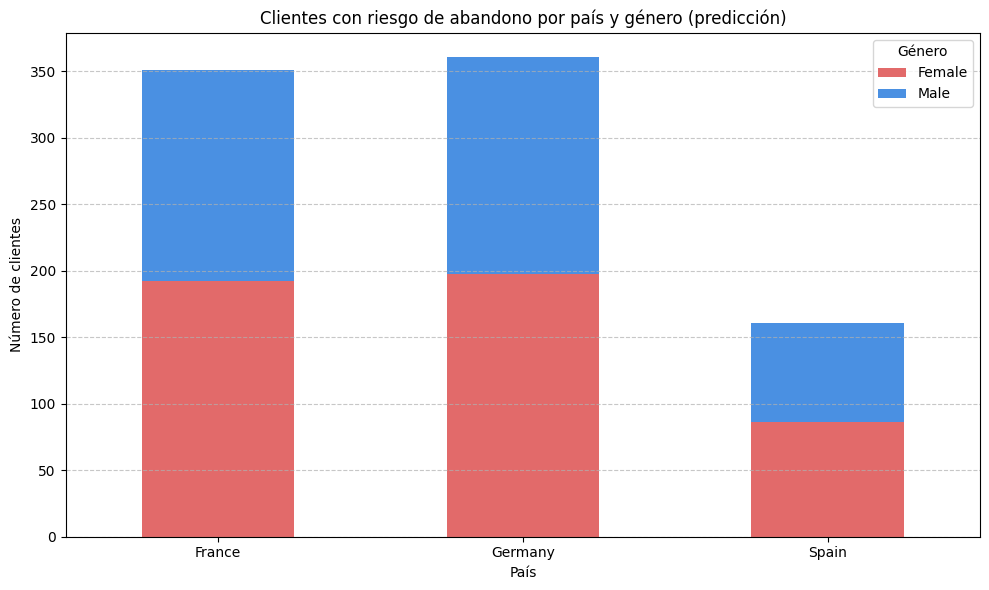

In [52]:
# Colores personalizados: azul para hombres, rosa para mujeres
colores = {'Male': '#4A90E2', 'Female': '#E26A6A'}

# Crear gráfico con colores definidos
resumen.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[colores[col] for col in resumen.columns]
)

plt.title("Clientes con riesgo de abandono por país y género (predicción)")
plt.ylabel("Número de clientes")
plt.xlabel("País")
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



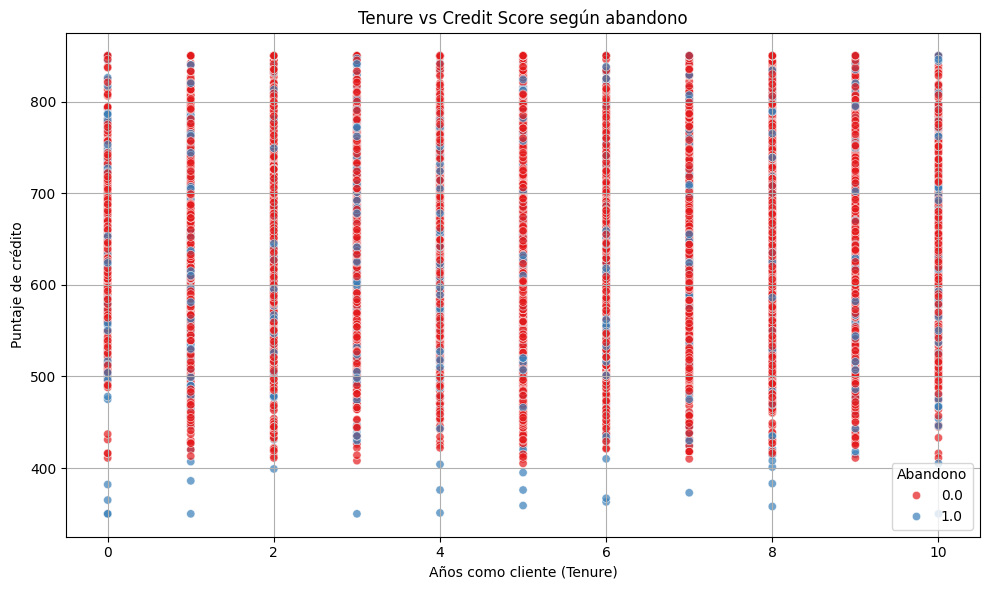

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tenure', y='CreditScore', hue='Exited', palette='Set1', alpha=0.7)
plt.title('Tenure vs Credit Score según abandono')
plt.xlabel('Años como cliente (Tenure)')
plt.ylabel('Puntaje de crédito')
plt.legend(title='Abandono')
plt.grid(True)
plt.tight_layout()
plt.show()


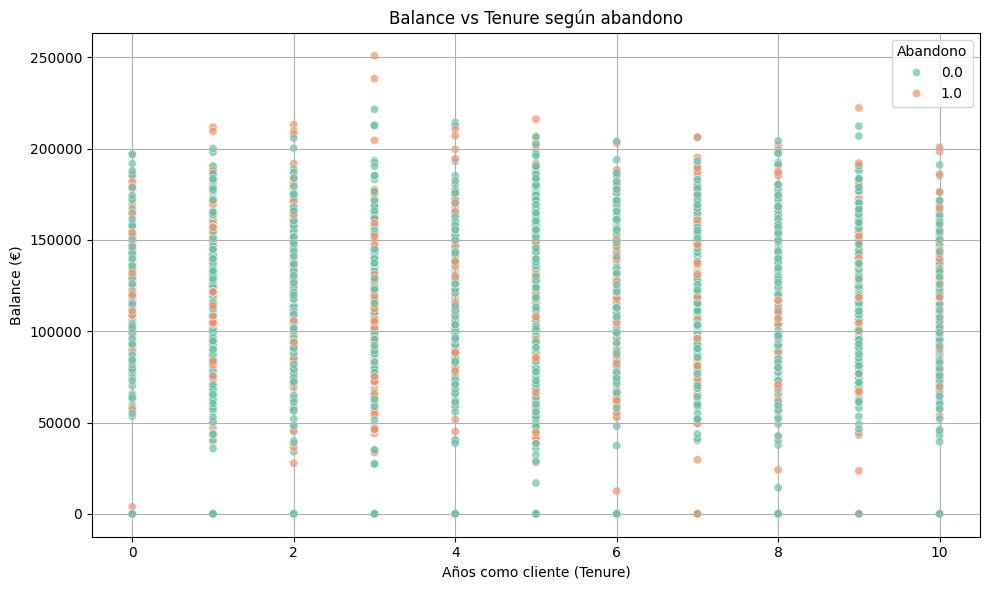

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tenure', y='Balance', hue='Exited', palette='Set2', alpha=0.7)
plt.title('Balance vs Tenure según abandono')
plt.xlabel('Años como cliente (Tenure)')
plt.ylabel('Balance (€)')
plt.legend(title='Abandono')
plt.grid(True)
plt.tight_layout()
plt.show()


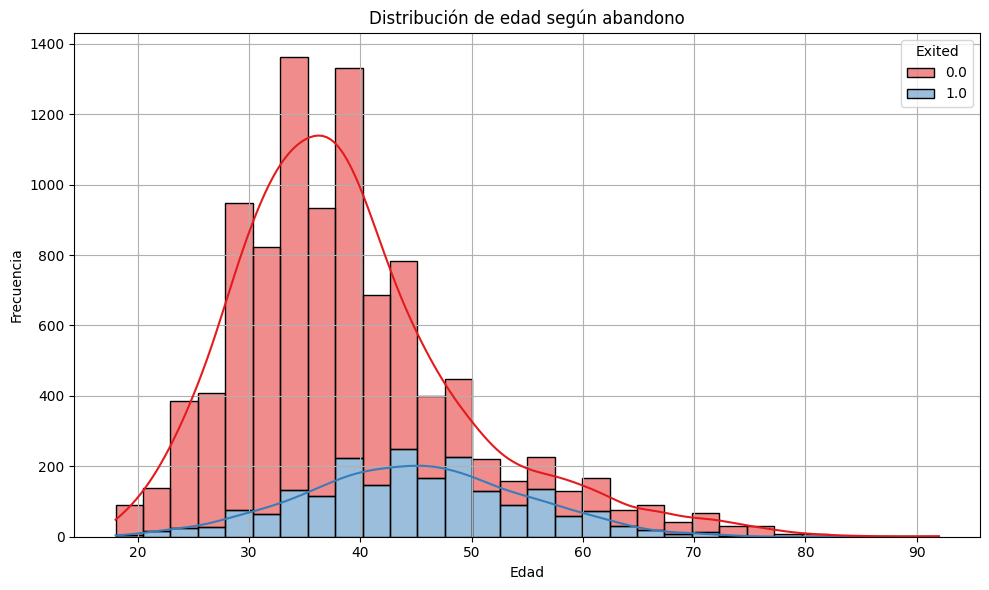

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, palette='Set1', multiple='stack', bins=30)
plt.title('Distribución de edad según abandono')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


Variables más influyentes:

La edad es una de las variables más determinantes en el abandono, especialmente en clientes mayores de 40 años.

El género y país también presentan patrones interesantes de abandono.

El balance de cuenta y el tenure (antigüedad) son factores a tener en cuenta.

Distribución del Riesgo:

La mayoría de los clientes se encuentran en niveles de riesgo bajo o muy bajo, pero hay un grupo importante en el nivel muy alto que merece especial atención.

Clientes en Riesgo:

El análisis por país y género permite diseñar estrategias personalizadas para retención en segmentos específicos como clientes alemanes o mujeres de mediana edad con balance alto.

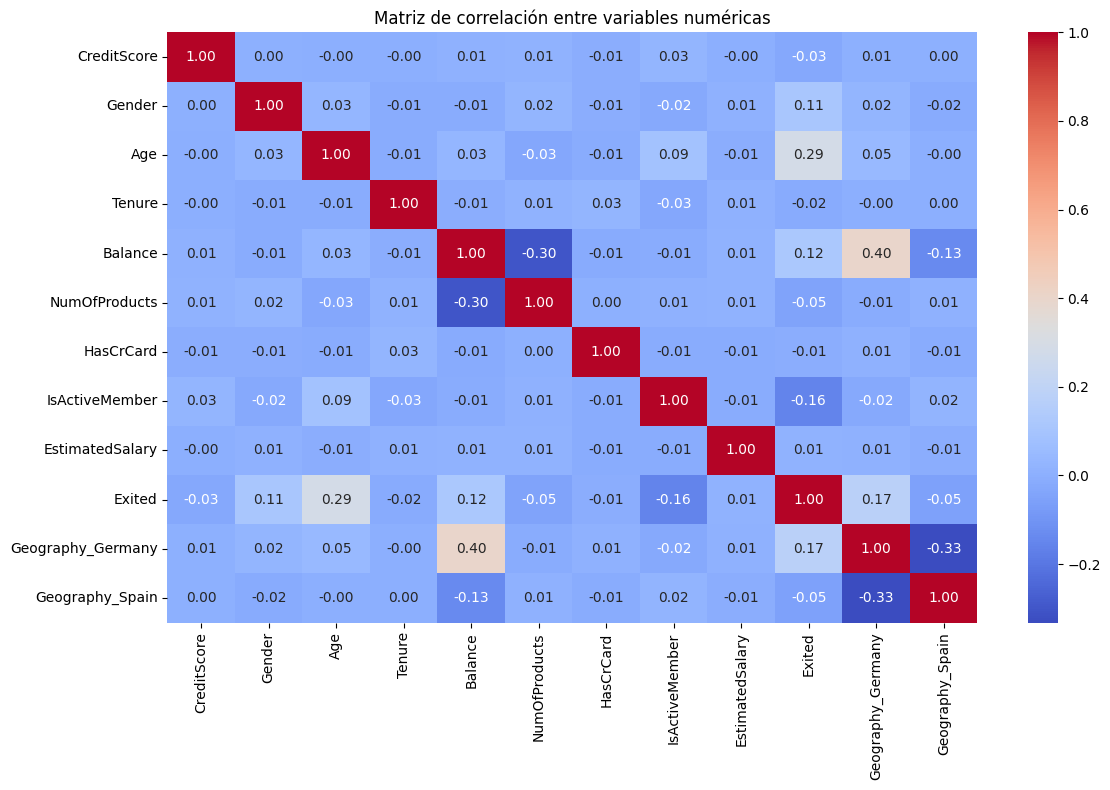

In [56]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


La correlación indica el grado de relación lineal entre dos variables numéricas. Los valores van de:

+1: correlación perfectamente positiva.

0: sin correlación lineal.

–1: correlación perfectamente negativa.

| Variable           | Correlación con `Exited` | Interpretación                                              |
|--------------------|--------------------------|-------------------------------------------------------------|
| **Age**            | 0.29                     | Cuanto mayor es el cliente, más probabilidad de abandonar. |
| **IsActiveMember** | –0.16                    | Los clientes activos tienden a quedarse.                   |
| **Balance**        | 0.12                     | Mayor balance asociado a mayor abandono, aunque débil.     |
| **Geography_Germany** | 0.17                  | Vivir en Alemania se asocia con más abandono.              |
| **Geography_Spain**   | –0.05                 | Vivir en España se asocia ligeramente con menor abandono.  |


8. CONCLUSIONES Y RECOMENDACIONES

Se realizó un análisis predictivo para identificar clientes con alta probabilidad de abandonar el banco.

El modelo que presentó mejor desempeño fue Random Forest con undersampling, con una métrica F1 de 0.69 y un AUC-ROC de 0.96, lo cual indica un equilibrio adecuado entre precisión y recuperación en un conjunto de datos desbalanceado.

Las variables que mostraron mayor correlación con el abandono (Exited) fueron:

Edad (Age): clientes mayores tienen mayor probabilidad de irse.

Balance: un balance elevado se asocia con mayor abandono.

Miembro Activo (IsActiveMember): los clientes activos tienden a quedarse.

Geografía (Geography_Germany): los clientes en Alemania mostraron más probabilidad de abandono.

El modelo Logistic Regression no logró un rendimiento competitivo frente a los métodos basados en árboles.

Enfocar campañas de retención en:

Clientes mayores de 40 años.

Clientes con balance elevado pero baja interacción (no activos).

Clientes de regiones con mayor propensión al abandono, como Alemania.

Monitorear clientes inactivos, ya que muestran una tendencia clara hacia el abandono.

Mantener y actualizar periódicamente el modelo, especialmente si se agregan nuevos productos o se expanden geográficamente.

Explorar modelos más avanzados como Gradient Boosting (XGBoost o LightGBM) para mejorar aún más las métricas si el tiempo de entrenamiento lo permite.

Implementar este modelo en un sistema de scoring de clientes para que el equipo de retención actúe proactivamente.

# CIERRE DEL PROYECTO

Este proyecto ha demostrado cómo aplicar técnicas de análisis exploratorio, ingeniería de características y modelos de aprendizaje automático para predecir la probabilidad de abandono de clientes en un banco. Se utilizó un enfoque iterativo y orientado a métricas para optimizar el rendimiento del modelo en un conjunto de datos desbalanceado.

"Convertir datos en decisiones es lo que transforma un negocio."

AUTOR: LUIS OSVALDO SILVA OROZCO

CONT@CTO: luisosvsilva@gmail.com